In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#import first sheet
df1 = pd.read_excel('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CHILD_ID              9543 non-null   int64         
 1   SERVICE_DATE          9543 non-null   datetime64[ns]
 2   START_TIME            9532 non-null   object        
 3   END_TIME              9532 non-null   object        
 4   SERVICE_SETTING       9533 non-null   object        
 5   SERVICE DELIVERY      9543 non-null   object        
 6   ADD_USER              9543 non-null   object        
 7   ADD_DATE              9543 non-null   datetime64[ns]
 8   IFSP Teaming ID name  9543 non-null   object        
 9   Agency Name           9543 non-null   object        
 10  Agency Type           9543 non-null   object        
 11  Service Name          9543 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 894.8+ KB


In [4]:
df2 = pd.read_excel('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name='All Children with IFSPs')
df2.info()

c:\Users\cjami\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138664 entries, 0 to 138663
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   POE            138664 non-null  object        
 1   Child ID       138664 non-null  int64         
 2   Referral Date  138664 non-null  datetime64[ns]
 3   Exit Date      15607 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 4.2+ MB


In [9]:
#count of telehealth visits
count_telehealth = df1['SERVICE_SETTING'].value_counts()['Telehealth']
count_telehealth

3604


In [11]:
#count of total visits
count_visits = df1['SERVICE_SETTING'].count()
count_visits

9533


In [33]:
#percentage of telehealth visits
percentage_telehealth = (count_telehealth/ count_visits) * 100
percentage_telehealth

37.8055176754432

In [32]:
#find the COUNT of ALL types of services listed in service_setting column
count_setting = df1['SERVICE_SETTING'].value_counts()
count_setting

Home               4010
Telehealth         3604
Community-based    1291
Other               628
Name: SERVICE_SETTING, dtype: int64

In [31]:
#get PERCENTAGE for all the types of services listed in service_setting column
percentage_setting = (count_setting / df1['SERVICE_SETTING'].count())*100
rounded_percentsetting = percentage_setting.round(2)
rounded_percentsetting

Home               42.06
Telehealth         37.81
Community-based    13.54
Other               6.59
Name: SERVICE_SETTING, dtype: float64

In [30]:
#get the COUNT off ALL types of services under service_name column
count_servicename = df1['Service Name'].value_counts()
count_servicename

Dev. Therapy Prof - Home/Community               7671
Occupational Therapy                              515
Speech Therapy                                    448
Physical Therapy                                  316
Dev. Therapy Center-Based                         154
Dev. Therapy - BCBA                               144
Eval/Assess - Developmental                        72
Vision Services                                    63
Physical Therapy Assistant                         32
Evaluation - Occupational Therapy                  26
IFSP Team Member Participation (Virtual)           20
IFSP Team Member Participation (Face-To-Face)      20
Evaluation - Speech Therapy                        16
Evaluation - Physical Therapy                      15
Dev. Therapy – Registered Behavior Tech (RBT)      11
Dev. Therapy - Behavior                             5
Consultation – Developmental Therapy                4
Assistive Technology                                3
Evaluation - BCBA Developmen

In [26]:
#get the PERCENTAGE off ALL types of names under service_name column
#highest type of visit was Developmental Therapy
percentage_servname = (count_servicename / df1['Service Name'].count())*100
rounded_percentage_servname = percentage_servname.round(2)
print(rounded_percentage_servname)

Dev. Therapy Prof - Home/Community               80.38
Occupational Therapy                              5.40
Speech Therapy                                    4.69
Physical Therapy                                  3.31
Dev. Therapy Center-Based                         1.61
Dev. Therapy - BCBA                               1.51
Eval/Assess - Developmental                       0.75
Vision Services                                   0.66
Physical Therapy Assistant                        0.34
Evaluation - Occupational Therapy                 0.27
IFSP Team Member Participation (Virtual)          0.21
IFSP Team Member Participation (Face-To-Face)     0.21
Evaluation - Speech Therapy                       0.17
Evaluation - Physical Therapy                     0.16
Dev. Therapy – Registered Behavior Tech (RBT)     0.12
Dev. Therapy - Behavior                           0.05
Consultation – Developmental Therapy              0.04
Assistive Technology                              0.03
Evaluation

In [42]:
#looking for highest count of service, and location, and IFSP Teaming ID Name
#Overall answer is Dev. Therapy, at Home
highest_service = df1['Service Name'].value_counts().idxmax()
highest_setting = df1['SERVICE_SETTING'].value_counts().idxmax()
highest_IFSP_TeamID = df1['IFSP Teaming ID name'].value_counts().idxmax()
print(highest_service)
print(highest_setting)
print(highest_IFSP_TeamID)



Dev. Therapy Prof - Home/Community
Home
IFSP Meeting


In [41]:
#get highest count of services within telehealth 

#create filtered_df with service_setting == telehealth
filtered_df1 = df1[df1['SERVICE_SETTING'] == 'Telehealth']
#find highest count of service_name looking at filtered df == telehealth
value_counts_telehealth = filtered_df1['Service Name'].value_counts()

highest_service_telehealth = value_counts_telehealth.idxmax()
highest_count_telehealth = value_counts_telehealth.max()

print("Highest Service (Telehealth):", highest_service_telehealth)
print("Count (Telehealth):", highest_count_telehealth)


Highest Service (Telehealth): Dev. Therapy Prof - Home/Community
Count (Telehealth): 3263


In [52]:
#covisits that are telehealth
filter_df1a = filtered_df1[filtered_df1['IFSP Teaming ID name']=='Co-Visit']
value_count_TH_covisit = filter_df1a.value_counts()
print(value_count_TH_covisit)

#775 records that are setting of TELEHEALTH and ifsp teaming id COVISIT, printed as Series

CHILD_ID  SERVICE_DATE  START_TIME  END_TIME  SERVICE_SETTING  SERVICE DELIVERY   ADD_USER              ADD_DATE             IFSP Teaming ID name  Agency Name                             Agency Type  Service Name                      
458850    2022-02-15    14:00:00    14:30:00  Telehealth       Service Delivered  BUCKCYNTHIA           2022-02-15 18:07:38  Co-Visit              Physical Therapy Services, PA (EIRA)    EIRA         Dev. Therapy Prof - Home/Community    1
507790    2022-05-05    12:30:00    13:30:00  Telehealth       Service Delivered  OLIVERSARAH           2022-05-06 12:39:54  Co-Visit              LeBonheur EI & Dev (LEAD) (vendor)      Independent  Speech Therapy                        1
509163    2022-02-03    11:30:00    12:30:00  Telehealth       Service Delivered  SIRKODIANE            2022-02-06 19:46:22  Co-Visit              Middle Tennessee State University       EIRA         Dev. Therapy Prof - Home/Community    1
509294    2022-02-22    18:00:00    19:00:00 

In [55]:
#COUNT of Telehealth Covisits
count_TH_covisit = value_count_TH_covisit.sum()
count_TH_covisit

775

In [56]:
#Identify this as a percentage
#divide count of telehealth covisit records by the count of total telehealth records *100
percentage_TH_cov = (count_telehealth/count_TH_covisit) * 100
percentage_TH_cov.round(2)

465.03

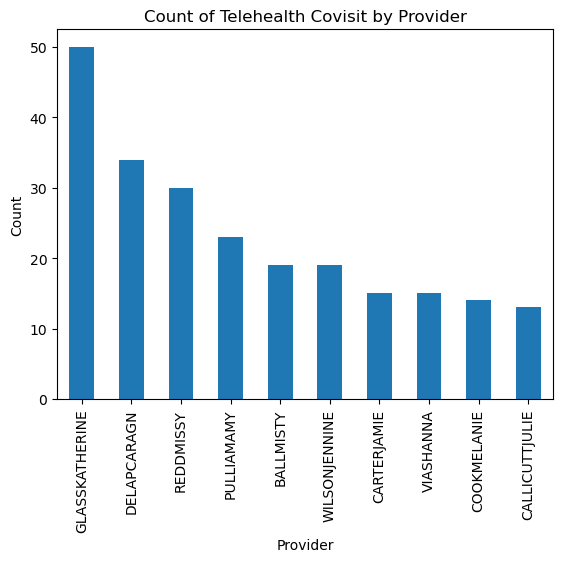

In [65]:
#create a graph by Provider
grouped_user = value_count_TH_covisit.groupby(value_count_TH_covisit.index.get_level_values('ADD_USER')).sum()
top_ten_providers = grouped_user.nlargest(10)
top_ten_providers.plot(kind='bar')
plt.xlabel('Provider')
plt.ylabel('Count')
plt.title('Count of Telehealth Covisit by Provider')
plt.show()

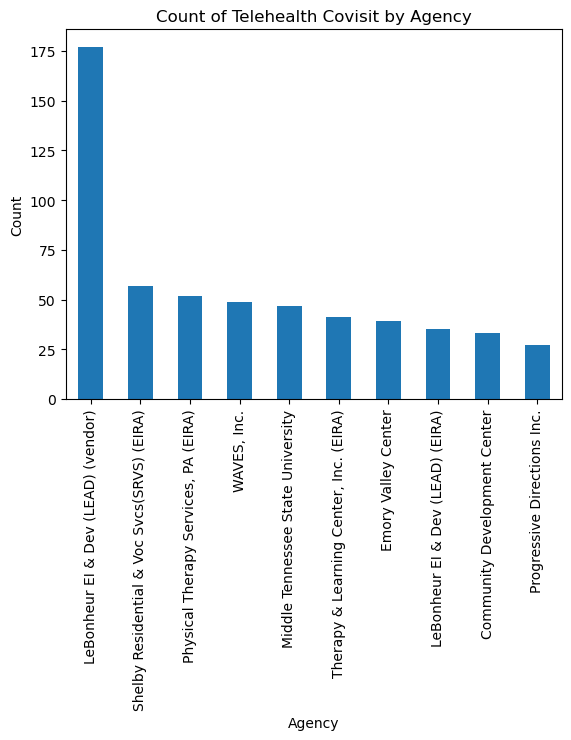

In [66]:
#create a graph by Agency
grouped_agency = value_count_TH_covisit.groupby(value_count_TH_covisit.index.get_level_values('Agency Name')).sum()
top_ten_agency = grouped_agency.nlargest(10)
top_ten_agency.plot(kind='bar')
plt.xlabel('Agency')
plt.ylabel('Count')
plt.title('Count of Telehealth Covisit by Agency')
plt.show()

In [71]:
#find the top 10 providers and the agency that they are associated with

#group by provider (using covisit and telehealth filters)
grouped_user = value_count_TH_covisit.groupby(value_count_TH_covisit.index.get_level_values('ADD_USER')).sum()
#select top 10
top_ten_providers = grouped_user.nlargest(10)
#new df with top 10 providers and their counts
top_provider_df = pd.DataFrame({'Provider': top_ten_providers.index})
#merge to get the agency
merge_df = top_provider_df.merge(df1[['ADD_USER', 'Agency Name']],how='left',left_on='Provider',right_on='ADD_USER')
merge_df= merge_df.drop_duplicates(subset='Provider')
merge_df.drop('ADD_USER',axis=1,inplace=True)
print(merge_df)


           Provider                             Agency Name
0    GLASSKATHERINE      LeBonheur EI & Dev (LEAD) (vendor)
50      DELAPCARAGN                             WAVES, Inc.
94        REDDMISSY      LeBonheur EI & Dev (LEAD) (vendor)
293      PULLIAMAMY      LeBonheur EI & Dev (LEAD) (vendor)
433       BALLMISTY    Physical Therapy Services, PA (EIRA)
506   WILSONJENNINE                     Emory Valley Center
558     CARTERJAMIE            Community Development Center
601       VIASHANNA  Infant Stimulation Program - UT Martin
637     COOKMELANIE             Progressive Directions Inc.
677  CALLICUTTJULIE      LeBonheur EI & Dev (LEAD) (vendor)


<function matplotlib.pyplot.show(close=None, block=None)>

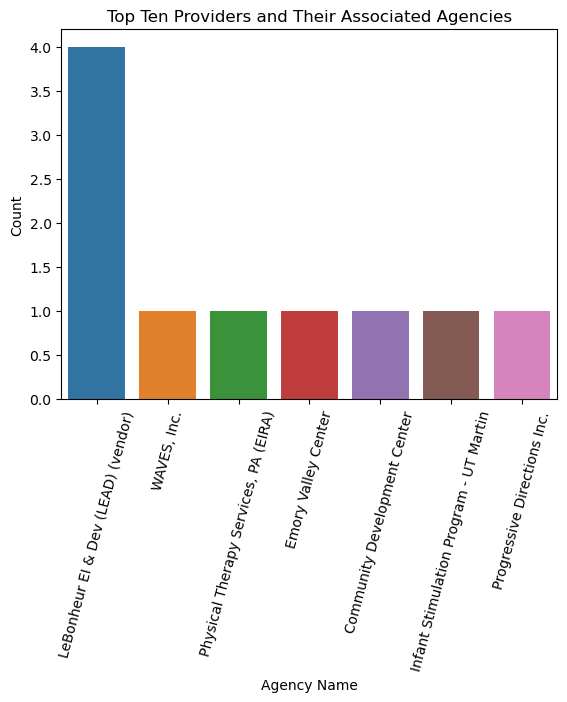

In [80]:
#turn above into a graph
sns.countplot(data=merge_df,x='Agency Name')
plt.xlabel('Agency Name')
plt.ylabel('Count')
plt.title('Top Ten Providers and Their Associated Agencies')
plt.xticks(rotation=75)
plt.show


In [85]:
#what agency has the highest amount of providers (using covisit and telehealth filters)?
#convert to df
df_value_count = value_count_TH_covisit.reset_index()
#count per agency
provider_count= df_value_count['Agency Name'].value_counts()
provider_count



LeBonheur EI & Dev (LEAD) (vendor)                   177
Shelby Residential & Voc Svcs(SRVS) (EIRA)            57
Physical Therapy Services, PA (EIRA)                  52
WAVES, Inc.                                           49
Middle Tennessee State University                     47
Therapy & Learning Center, Inc. (EIRA)                41
Emory Valley Center                                   39
LeBonheur EI & Dev (LEAD) (EIRA)                      35
Community Development Center                          33
Progressive Directions Inc.                           27
Rehab At Your Place (EIRA)                            26
Michael Dunn Center/ The Henry Center                 24
Expanding Horizons - ETSU                             21
Signal Centers, Inc.                                  19
Infant Stimulation Program - UT Martin                17
Kid's Putnam, Inc.                                    14
Support Solutions of the Mid-South (CS Patterson)     14
BEST (Blind-Visually Impaired E